In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [2]:
# Simulating Data
n = 1000
x = np.random.normal(3, 5, size=n)
y = -15 * x + 20 + np.random.normal(0, 3, size=n)

In [3]:
# Analytcal approach for solving linear regression
X = np.sum(x)
Y = np.sum(y)
b1 = (n * np.dot(x,y) - Y*X)/(n*np.dot(x,x)-X**2)
b0 = (Y-b1*X)/n
b1, b0 = round(b1, 2), round(b0, 2)
print(f"y = {b1} x + {b0}")

y = -15.03 x + 20.0


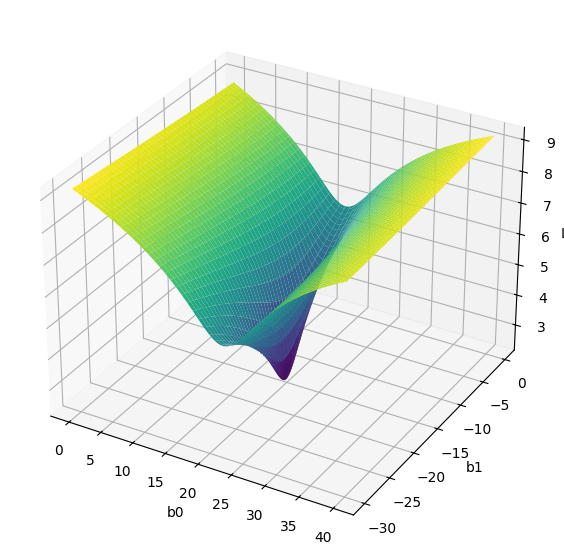

In [4]:
def MSE_loss(b0, b1, x, y):
    pred = b0 + b1 * x
    loss = np.sum((pred - y) ** 2) / len(y)
    return loss

# Generate a grid of b0 and b1 values around the real b0=20 and b1=-15
b0_vals = np.linspace(0, 40, 100)
b1_vals = np.linspace(-30,0, 100)

# Calculate MSE loss for each point of this grid
# Log-scale is used only for better visualization
Z = np.zeros((len(b0_vals),len(b1_vals)))
for i in range(len(b0_vals)):
    for j in range(len(b1_vals)):
        Z[i, j] = np.log(MSE_loss(b0_vals[i], b1_vals[j], x, y))

# 3D Plot of MSE loss in log-scale
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
B0, B1 = np.meshgrid(b0_vals, b1_vals)
ax.plot_surface(B0, B1, Z, cmap='viridis')

# Adding labels
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('Loss')
plt.show()


20.0 -15.03 9.532
0.00019961905736495876


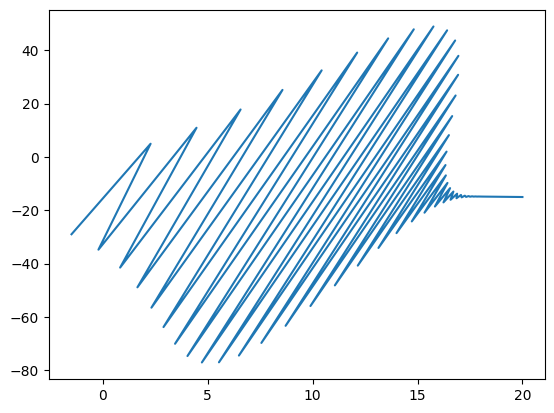

In [5]:
# Gradient descent
def gradient(b0, b1, x, y):
    yhat = b0 + b1 * x
    error = (y-yhat)**2
    db0 = - 2 * (y - yhat)
    db1 = - 2 * x * (y - yhat)
    return db0, db1, error

b1 , b0 = 0, 0
alpha = 0.03
b0l, b1l, errl = [],[],[]
for epoch in range(1000):
    Gb0, Gb1, Error = 0, 0, 0
    for i in range(n):
        gb0, gb1,err = gradient(b0, b1, x[i], y[i])
        Gb0, Gb1, Error = Gb0 + gb0, Gb1 + gb1, Error + err
    Gb0, Gb1, Error = Gb0/n, Gb1/n, Error/n
    b0, b1 = b0 - alpha * Gb0, b1 - alpha * Gb1
    alpha = .995 * alpha
    b0l.append(b0)
    b1l.append(b1)
    errl.append(err)
    #print(round(Error,3))
print(round(b0, 2), round(b1, 2), round(Error, 3))
print(alpha)
plt.plot(b0l, b1l)

In [6]:
#Simulate D-dimendional data
D=10
n=1000
sd = 5
B = np.random.uniform(-20, 20, size=D)
B0 = np.random.uniform(-20,20)
x = np.random.uniform(-10,10, size=(n,D))
y = []
for i in range(n):
    y.append(np.dot(x[i,],B)+B0+np.random.normal(0,sd))

In [7]:
def gradient(b,b0,x,y):
    yh = np.dot(b,x)+b0
    err = (y-yh)**2
    db0 = -2 * (y-yh)
    db = -2 * x * (y-yh)
    #print(db0)
    return db, db0, err

b0 = np.random.uniform(-10,10)
b = np.random.uniform(-10,10,size=D)
alpha = 0.02
for epoch in range(100):
    Db, Db0, Err = np.zeros(D), 0, 0
    for i in range(n):
        db, db0, err = gradient(b, b0, x[i,], y[i])
        Db, Db0, Err = Db + db, Db0 + db0, Err + err
    Db, Db0, Err = Db/n, Db0/n, Err/n
    b = b - alpha * Db
    b0 = b0 - alpha * Db0
print("Correct coefficients:",B, B0)
print("Predicted coefficients:",b, b0, Err)


Correct coefficients: [  0.06942037 -12.02167512 -12.88358382  15.74289941  14.68709871
  10.79514377  15.84461762   5.33807956  -4.27683559   8.68896844] -8.731928856067594
Predicted coefficients: [  0.07694749 -12.07027686 -12.85483872  15.72250999  14.69308197
  10.74922945  15.85624509   5.32353449  -4.29725668   8.68111922] -8.74456249859634 27.462535983837537
